# **Calculate rates of return and risk of a portfolio of stocks**

**We can use historical rates of return as a reasonable proxy of expected rates of return of a security. We cannot predict returns of a security.**

# Rate of return of a portfolio of stocks

**Expected Return of the Portfolio E(Rp) = Σ (Weight of each asset × Expected Return of each asset)**

**Sum of weights is equal to one.**

**REFERENCE**: https://www.investopedia.com/ask/answers/061215/how-can-i-calculate-expected-return-my-portfolio.asp#:~:text=The%20formula%20for%20expected%20portfolio,Expected%20Return%20of%20each%20asset)

**1.1 Simple rate of return**



$$
\frac{P_1 - P_0}{P_0} = \frac{P_1}{P_0} - 1
$$

**Log return vs. simple return:**
- use log rate of return when there is a single security whose rate of return is needed over multiple time periods.
- use simple rate of return to compare returns of multiple securities over the same time period

https://en.wikipedia.org/wiki/Rate_of_return,  
https://www.allquant.co/post/magic-of-log-returns-concept-part-1


# Volatility/Risk of a portfolio of stocks

Depends on variances of securities and correlation/covariance of securities in the portfolio.

**Covariance of returns**
<br>To what extent do variables change together. Covariance calculated from a sample is given below. <br>
We can get the direction of the relationship but not the strength as it is dependent on the scale of the variables. <br>

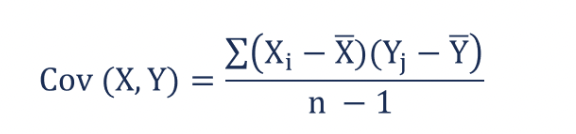

Xi - the values of the X-variable <br>
Yj - the values of the Y-variable <br>
X̄ - the mean (average) of the X-variable <br>
Ȳ - the mean (average) of the Y-variable <br>
n - the number of data points <br>

source: https://corporatefinanceinstitute.com/resources/data-science/covariance/

**Correlation of returns**


Measures the strength of the relationship between variables. It is independent of the scales of the vairables and is between -1 and +1. +ve correlation indicate the two variables move in the same direction. -ve correlation indicate the two variables move in the opposite direction. Higher the absolute value of the correlation, higher the extent of variation. <br>
https://www.investopedia.com/terms/c/correlationcoefficient.asp

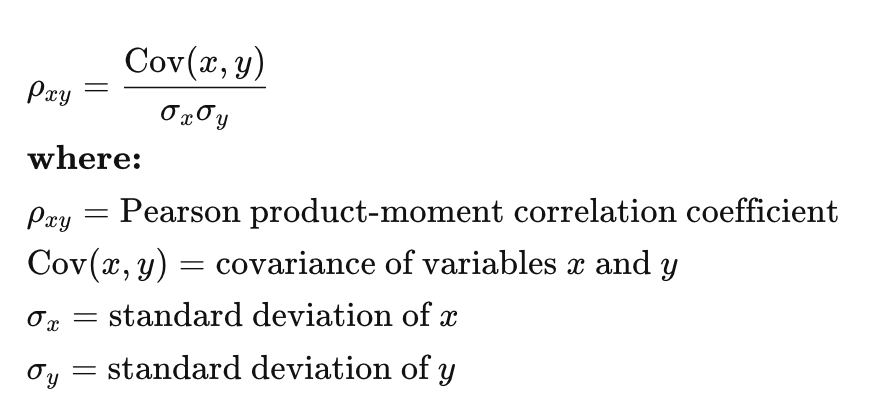

**Calculate risk of a portfolio**

Portfolio variance measures the risk in a given portfolio, calculated using the variance of the individual assets in the portfolio. The portfolio variance is equal to the portfolio's standard deviation squared.

The formula for portfolio variance in a two-asset portfolio is as follows: <br>

Portfolio variance = w<sub>1</sub><sup>2</sup>σ<sub>1</sub><sup>2</sup> + w<sub>2</sub><sup>2</sup>σ<sub>2</sub><sup>2</sup> + 2w<sub>1</sub>w<sub>2</sub>σ<sub>1,2</sub> <br>
Where:

w<sub>1</sub> = the portfolio weight of the first asset <br>
w<sub>2</sub> = the portfolio weight of the second asset <br>
σ<sub>1</sub> = the standard deviation of the first asset <br>
σ<sub>2</sub> = the standard deviation of the second asset <br>
σ<sub>1,2</sub> = the co-variance of the two assets, which can thus be expressed as p<sub>(1,2)</sub>σ<sub>1</sub>σ<sub>2</sub>, where p<sub>(1,2)</sub> is the correlation co-efficient between the two assets <br>

source: https://www.investopedia.com/terms/p/portfolio-variance.asp <br>
A lower correlation between securities in a portfolio results in a lower portfolio variance. <br>
Overall portfolio variance is lower than a simple weighted average of the individual variances of the stocks in the portfolio. <br>
The level of risk can be measured using the standard deviation, which is the square root of the variance. If data points are far away from the mean, then the variance is high, and the overall level of risk in the portfolio is high as well. <br>
The higher the standard deviation, the more risk of the portfolio, while the opposite is true for a low standard deviation.


**Portfolio variance in matrix notation**

Portfolio variance = Transpose of weights vector * Covariance matrix * weights vector <br>
Portfolio variance = weights.T * Cov_matrix * weights

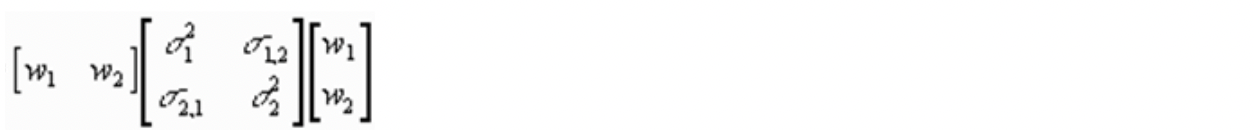

The first term is the transpose of the weights vector, weights.T= [w<sub>1</sub> &nbsp; &nbsp; w<sub>2</sub>] <br>
The second term is the covariance matrix, Cov_matrix <br>
The third term is the weights vector, weights.


*We will use the dot() method of numpy to multiple the matrices*

# **Diversifiable risk and Non-Diversifiable risk**

*Systematic Variance/Non-Diversifiable risk* : This depends on variances of each security in the portfolio. This is not diversifiable. It is inherent to the market as a whole, affecting all companies. This reflects the impact of economic, geopolitical, and financial factors or events eg. recession, war, earthquakes. lower consumer spending.


*Unsystematic Variance/Diversifiable risk/Idiosyncratic risk:* This risk is is diversifiable. It is company specific or industry specific. It can be smoothed out through diversification. Research shows portfolio of more than 25 to 30 stocks which are not correlated can make this risk disappear.

source: https://www.investopedia.com/terms/s/systematicrisk.asp#toc-example-systematic-risk-and-the-great-recession


Total Variance = Systematic Variance + Unsystematic Variance

Unsystematic Variance = Total Variance - Systematic Variance

Unsystematic Risk = &radic;(Total Variance - Systematic Variance)

**2. Extract price data using an API**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


https://numpy.org/

https://pandas.pydata.org/

https://matplotlib.org/

https://pypi.org/project/yfinance/

https://pandas-datareader.readthedocs.io/en/latest/readers/yahoo.html


**Download data**

In [3]:
# 2.1 Download data using the yahoo finance API
# To calculate return we use the adjusted close price as it reflects dividend payments to shareholders and operations such as stock splits.*
# Data for trading days. no data for saturdays/sundays and bank holidays.

# 2.1.1 securities inthe portfolio
tickers = ['UL', 'MSFT', 'GOOG', 'AMZN', 'AAPL']

# 2.1.2 dataframe to store the price data of the securities inthe portfolio
df = pd.DataFrame()

# 2.1.3 for each security in the portfolio, download price data using the yahoo finance API and store in the df pandas dataframe
for t in tickers:
    df[t] = yf.download(t, start='2014-1-1')['Adj Close']

# 2.1.4 print metadata on dataframe df
df.info()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2733 entries, 2014-01-02 00:00:00+00:00 to 2024-11-08 00:00:00+00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UL      2733 non-null   float64
 1   MSFT    2733 non-null   float64
 2   GOOG    2733 non-null   float64
 3   AMZN    2733 non-null   float64
 4   AAPL    2733 non-null   float64
dtypes: float64(5)
memory usage: 128.1 KB


**2.2 Check if the data is ok using the head() and tail() functions of pandas.**

In [4]:
df.head()

,UL,MSFT,GOOG,AMZN,AAPL
Date,,,,,
2014-01-02 00:00:00+00:00,27.890923,31.120739,27.656164,19.898500,17.234297
2014-01-03 00:00:00+00:00,27.856325,30.911360,27.454418,19.822001,16.855728
2014-01-06 00:00:00+00:00,27.780212,30.258121,27.760517,19.681499,16.947645
2014-01-07 00:00:00+00:00,27.884003,30.492615,28.295689,19.901501,16.826441
2014-01-08 00:00:00+00:00,27.558809,29.948263,28.354576,20.096001,16.933010


In [5]:
df.tail()

,UL,MSFT,GOOG,AMZN,AAPL
Date,,,,,
2024-11-04 00:00:00+00:00,60.820427,408.459991,170.679993,195.779999,221.766006
2024-11-05 00:00:00+00:00,61.167629,411.459991,171.410004,199.500000,223.204422
2024-11-06 00:00:00+00:00,58.796715,420.179993,178.330002,207.089996,222.475235
2024-11-07 00:00:00+00:00,59.134003,425.429993,182.279999,210.050003,227.229996
2024-11-08 00:00:00+00:00,59.000000,422.540009,179.860001,208.179993,226.960007


**3. Normalize to 100**

$$
\frac {P_t}{P_0} * 100
$$

**Normalizing enables to compare the price of different stocks starting from the same value. If we do not do this, adjusted closing prices are plotted directly and does not have a good landmark.**

In [6]:
print(df.loc['2014-01-02'])

UL      27.890923
MSFT    31.120739
GOOG    27.656164
AMZN    19.898500
AAPL    17.234297
Name: 2014-01-02 00:00:00+00:00, dtype: float64


In [7]:
print(df.iloc[0])

UL      27.890923
MSFT    31.120739
GOOG    27.656164
AMZN    19.898500
AAPL    17.234297
Name: 2014-01-02 00:00:00+00:00, dtype: float64


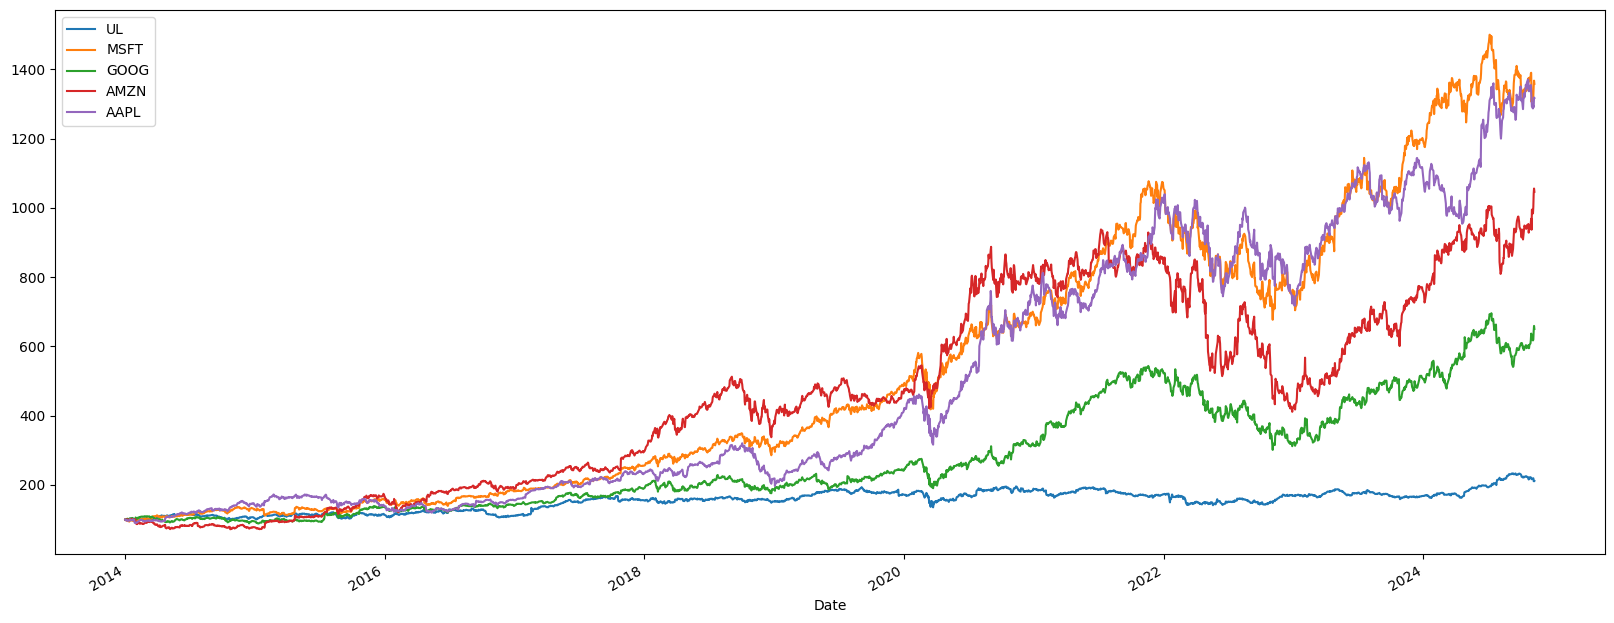

In [8]:
# 3.1 Normalize to 100 and plot prices over time: Normalizing enables to compare the price of different stocks starting from the same value.
# plot the normalized data
(df / df.iloc[0] * 100).plot(figsize = (20, 8));
plt.show()

**4. Calculate returns of the securities in the portfolio**



**4.1 Simple return of a security**

$$
\frac{P_1 - P_0}{P_0} = \frac{P_1}{P_0} - 1
$$

*To calculate return, we will use the adjusted close price as it reflects dividend payments to shareholders and operations such as stock splits.*

*The shift(n) method in pandas gives the value at row with lag n.
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html*

In [13]:
# 4.1 Calculate the daily simple rate of returns of the securities in the portfolio using the adjusted close price
returns = (df / df.shift(1)) - 1
returns.head()

,UL,MSFT,GOOG,AMZN,AAPL
Date,,,,,
2014-01-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2014-01-03 00:00:00+00:00,-0.001240,-0.006728,-0.007295,-0.003845,-0.021966
2014-01-06 00:00:00+00:00,-0.002732,-0.021133,0.011149,-0.007088,0.005453
2014-01-07 00:00:00+00:00,0.003736,0.007750,0.019278,0.011178,-0.007152
2014-01-08 00:00:00+00:00,-0.011662,-0.017852,0.002081,0.009773,0.006333


**4.2 Annual returns of the securities**

In [14]:
#4.2 Calculate annual returns of securities. Approx 250 trading days in a year.
annual_returns = returns.mean() * 250
print(annual_returns)

UL      0.090287
MSFT    0.273821
GOOG    0.209758
AMZN    0.268107
AAPL    0.274979
dtype: float64


# **5. Portfolio annual return**

**FORMULA: Expected Return of the Portfolio E(Rp) = Σ (Weight of each asset × Expected Return of each asset)**

**Sum of weights is equal to one.**

**We will use the dot() method in numpy to calculate the dot product of weights of securities and return of securities in the portfolio.  This will multiply each stock’s weight and respective return and sum them.**

In [15]:
#5.1 weights of the securities in portfolios
# ['UL', 'MSFT', 'GOOG', 'AMZN', 'AAPL']

#5.1.1 weights of the securities in portfolio1
weights1 = np.array([0.20, 0.20, 0.20, 0.20, 0.20])

#5.1.2 weights of the securities in portfolio2
weights2 = np.array([0.2,0.3,0.15,0.15,0.2])

In [16]:
#5.2.1 Expected annual rate of return of Portfolio 1
portfolio_annual_return1 = np.dot(annual_returns, weights1)
print("Portfolio 1 - Annual return %: ", 100*portfolio_annual_return1)

Portfolio 1 - Annual return %:  22.33904382763756


In [17]:
#5.2.2 Expected annual rate of return of Portfolio 2
portfolio_annual_return2 = np.dot(annual_returns, weights2)
print("Portfolio 2 - Annual return %: ", 100*portfolio_annual_return2)

Portfolio 2 - Annual return %:  22.687928736233616


# **6. Calculate risk/volatility of a portfolio**

**6.1 Calculate the risk of the securities in the portfolio**

*Risk is the volatility/variability of returns. It is measured by variance or standard deviation of returns of a stock. It measures the deviation from the mean. A volatile stock is more likely to deviate from historical returns and surprise investors*

**References:**
https://www.investopedia.com/ask/answers/021915/how-standard-deviation-used-determine-risk.asp
https://www.investopedia.com/terms/s/standarddeviation.asp
https://www.investopedia.com/articles/stocks/11/calculating-risk-reward.asp#:~:text=When%20you%27re%20an%20individual,price%20of%20your%20maximum%20risk.

In [18]:
# 6.1.1 Daily risk of each security
print(returns.std())

UL      0.013177
MSFT    0.016745
GOOG    0.017543
AMZN    0.020655
AAPL    0.017658
dtype: float64


In [31]:
# 6.1.2 Annual variance of each secusity
Var= returns.var() * 250
print(Var)

UL      0.043405
MSFT    0.070095
GOOG    0.076941
AMZN    0.106653
AAPL    0.077954
dtype: float64


Annual risk = square root of (variance of daily returns * 250) = standard deviation of daily returns * square root of 250

In [24]:
# 6.1.3 Annual risk of each security
print (returns.std() * 250 ** 0.5)

UL      0.208340
MSFT    0.264755
GOOG    0.277382
AMZN    0.326578
AAPL    0.279202
dtype: float64


**6.2 Calculate risk/volatility of a portfolio**

In [20]:
#6.2.1 Calculate covariance matrix of daily returns of stocks in the portfolio
cov_matrix_a = returns.cov() * 250
print(cov_matrix_a)

            UL      MSFT      GOOG      AMZN      AAPL
UL    0.043405  0.019246  0.017053  0.016106  0.018173
MSFT  0.019246  0.070095  0.051762  0.053870  0.048805
GOOG  0.017053  0.051762  0.076941  0.057602  0.045425
AMZN  0.016106  0.053870  0.057602  0.106653  0.048276
AAPL  0.018173  0.048805  0.045425  0.048276  0.077954


In [21]:
#6.2.2 Calculate correlation matrix of daily returns of stocks in the portfolio
corr_matrix= returns.corr()
print(corr_matrix)

            UL      MSFT      GOOG      AMZN      AAPL
UL    1.000000  0.348914  0.295091  0.236723  0.312411
MSFT  0.348914  1.000000  0.704835  0.623039  0.660243
GOOG  0.295091  0.704835  1.000000  0.635878  0.586541
AMZN  0.236723  0.623039  0.635878  1.000000  0.529450
AAPL  0.312411  0.660243  0.586541  0.529450  1.000000


In [22]:
# 6.3 Portfolio 1: Calculate portfolio variance
portfolio_var1 = np.dot(weights1.T, np.dot(returns.cov() * 250, weights1))
print(portfolio_var1)

0.04510742778193999


In [23]:
# 6.4 Portfolio 1: Calculate volatility/risk of portfolio - standard deviation of variance of portfolio
portfolio_vol1 = (portfolio_var1) ** 0.5
print('Portfolio volatility in %: ', round(100*portfolio_vol1,5))

Portfolio volatility in %:  21.23851


# 7. Calculate diversifiable risk and Non-Diversifiable risk

Total Variance = Systematic Variance + Unsystematic Variance

Unsystematic Variance = Total Variance - Systematic Variance

Unsystematic Risk = &radic;(Total Variance - Systematic Variance)

In [40]:
print(Var.iloc[0])
print(Var.iloc[0]*2+Var.iloc[1]*2)
print(weights1[0])

0.04340539940117373
0.22700158472833473
0.2


In [43]:
# 7.1 Portfolio 1: Calculate diversifiable risk
unsystematic_variance1 = portfolio_var1 - (weights1[0] ** 2 * Var.iloc[0] + weights1[1] ** 2 * Var.iloc[1] +
                                           weights1[2] ** 2 * Var.iloc[2] + weights1[3] ** 2 * Var.iloc[3] +
                                           weights1[4] ** 2 * Var.iloc[4])
print(unsystematic_variance1)

0.03010548016380665


In [44]:
# 7.2 Portfolio 1 : Non-Diversifiable risk
systematic_variance = portfolio_var1 - unsystematic_variance1
print(systematic_variance)

0.015001947618133341
